In [ ]:
#load libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras import optimizers
from keras.models import load_model
from sklearn.metrics import mean_absolute_error
import os

**Some function definitions which will generate input and output pair of sequences.**

In [ ]:
# generate input and output pairs of sequences
def create_sequences_LSTM(data, length, output):
    nsignals = len(data[0])
    siglen = len(data)
    sampX=[]
    sampy=[]
    indx = siglen - output - length
    for j in range(nsignals):
        sig = data[:,j]
        for i in range(indx):
            tempX = sig[i:length+i]
            tempy = sig[i+length:length+i+output]
            sampX.append(tempX)
            sampy.append(tempy)
    nsamples = len(sampX)        
    X = np.array(sampX).reshape(nsamples, length, 1)
    y = np.array(sampy).reshape(nsamples, output) 
    return X, y  

**Function for splitting training and testing dataset:**

In [ ]:
def define_test_dataset_LSTM(X, y, n_patterns, ntestsigs):
    testindex = int(np.floor(ntestsigs*n_patterns))
    X_train = X[:-testindex,:,:]
    y_train = y[:-testindex,:]
    X_test = X[-testindex:,:,:]
    y_test = y[-testindex:,:]
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train, y_train, X_test, y_test

**Mean absolute scaled error(MASE)**

In [ ]:
def MASE(realData, predictedData):
    """ Regression Error metric = mean absolute scaled error (MASE)"""
    a1 = realData[:,1:]
    a2 = realData[:,:-1]
    maseErr = mean_absolute_error(a1,predictedData[:,1:])/mean_absolute_error(a1,a2)
    return maseErr

**Load LSTM Datasets:**

In [ ]:
ndataset = 5
length = 10
output = length

In [ ]:
############# POD mode 1
fM1 = h5py.File('PODm1_MHD32BoxALL.mat')
dataM1 = fM1.get('data')
dataM1 = np.transpose(dataM1)

# configure problem
nsignals = dataM1.shape[1]
siglen = dataM1.shape[0]

# Extract sequences
inputdata = dataM1[:,0:ndataset]
XM1, yM1 = create_sequences_LSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM1, y_trainM1, X_testM1_L, y_testM1_L = define_test_dataset_LSTM(XM1, yM1, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 2
fM2 = h5py.File('PODm2_MHD32BoxALL.mat')
dataM2 = fM2.get('data')
dataM2 = np.transpose(dataM2)

# Extract sequences
inputdata = dataM2[:,0:ndataset]
XM2, yM2 = create_sequences_LSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM2, y_trainM2, X_testM2_L, y_testM2_L = define_test_dataset_LSTM(XM2, yM2, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 3

fM3 = h5py.File('PODm3_MHD32BoxALL.mat')
dataM3 = fM3.get('data')
dataM3 = np.transpose(dataM3)

# Extract sequences
inputdata = dataM3[:,0:ndataset]
XM3, yM3 = create_sequences_LSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM3, y_trainM3, X_testM3_L, y_testM3_L = define_test_dataset_LSTM(XM3, yM3, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 4

fM4 = h5py.File('PODm4_MHD32BoxALL.mat')
dataM4 = fM4.get('data')
dataM4 = np.transpose(dataM4)

# Extract sequences
inputdata = dataM4[:,0:ndataset]
XM4, yM4 = create_sequences_LSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM4, y_trainM4, X_testM4_L, y_testM4_L = define_test_dataset_LSTM(XM4, yM4, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 5

fM5 = h5py.File('PODm5_MHD32BoxALL.mat')
dataM5 = fM5.get('data')
dataM5 = np.transpose(dataM5)

# Extract sequences
inputdata = dataM5[:,0:ndataset]
XM5, yM5 = create_sequences_LSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM5, y_trainM5, X_testM5_L, y_testM5_L = define_test_dataset_LSTM(XM5, yM5, ntestpatterns, ntestsigs)
print(X_testM5_L.shape)

(1004, 10, 1)


**Load LSTM Model:**

In [ ]:
model = load_model('MHD32boxROMPODm1ncell250lr0.0005bs32c1.h5')
print('Loaded POD model')

Loaded POD model


**ROM prediction time index for all POD modes**

**EVALUATE: Predict future instance of POD coeffs and compare with truth value on test signal**

In [ ]:
timeIndex = np.random.randint(0, ntestpatterns + 1)
print('Time Index is', timeIndex)

Time Index is 836


In [ ]:
############# POD mode 1
datainputM1 = X_testM1_L[timeIndex ,:,:]
datainputM1 = datainputM1.reshape(1, length, 1)
realdataM1 = y_testM1_L[timeIndex ,:]
realdataM1 = np.transpose(realdataM1).reshape(1,output)
predictedM1 = model.predict(datainputM1, verbose=0)

############# POD mode 2
datainputM2 = X_testM2_L[timeIndex ,:,:]
datainputM2 = datainputM2.reshape(1, length, 1)
realdataM2 = y_testM2_L[timeIndex ,:]
realdataM2 = np.transpose(realdataM2).reshape(1,output)
predictedM2 = model.predict(datainputM2, verbose=0)

############# POD mode 3
datainputM3 = X_testM3_L[timeIndex ,:,:]
datainputM3 = datainputM3.reshape(1, length, 1)
realdataM3 = y_testM3_L[timeIndex ,:]
realdataM3 = np.transpose(realdataM3).reshape(1,output)
predictedM3 = model.predict(datainputM3, verbose=0)

############# POD mode 4
datainputM4 = X_testM4_L[timeIndex ,:,:]
datainputM4 = datainputM4.reshape(1, length, 1)
realdataM4 = y_testM4_L[timeIndex ,:]
realdataM4 = np.transpose(realdataM4).reshape(1,output)
predictedM4 = model.predict(datainputM4, verbose=0)

############# POD mode 5
datainputM5 = X_testM5_L[timeIndex ,:,:]
datainputM5 = datainputM5.reshape(1, length, 1)
realdataM5 = y_testM5_L[timeIndex ,:]
realdataM5 = np.transpose(realdataM5).reshape(1,output)
predictedM5 = model.predict(datainputM5, verbose=0)

**Plot ALL predicted coefficient:**

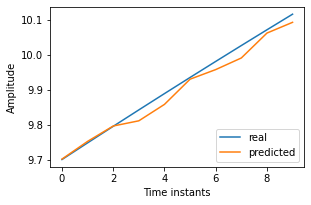

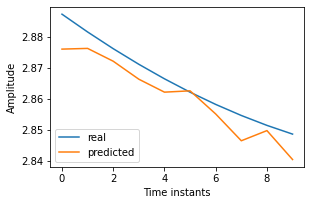

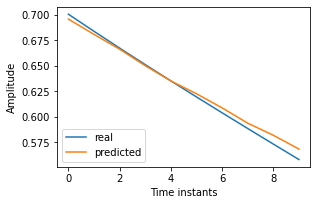

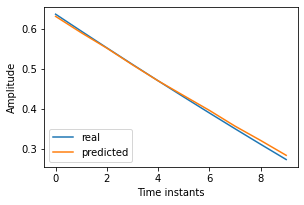

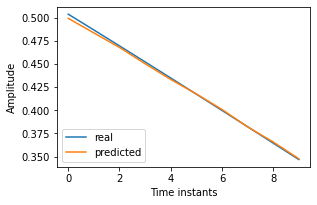

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(np.transpose(realdataM1), label='real')
plt.plot(np.transpose(predictedM1), label='predicted')
plt.legend(['real', 'predicted'], loc='lower right')
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(322)
plt.plot(np.transpose(realdataM2), label='real')
plt.plot(np.transpose(predictedM2), label='predicted')
plt.legend(['real', 'predicted'], loc='lower left')
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(323)
plt.plot(np.transpose(realdataM3), label='real')
plt.plot(np.transpose(predictedM3), label='predicted')
plt.legend(['real', 'predicted'], loc='lower left')
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(324)
plt.plot(np.transpose(realdataM4), label='real')
plt.plot(np.transpose(predictedM4), label='predicted')
plt.legend(['real', 'predicted'], loc='lower left')
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(325)
plt.plot(np.transpose(realdataM5), label='real')
plt.plot(np.transpose(predictedM5), label='predicted')
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.legend(['real', 'predicted'], loc='lower left')
plt.show()

**Error calculation(MASE)**

In [ ]:
############# POD mode 1
errTotM1 = []

for idx in range(ntestpatterns):
    datainputM1 = X_testM1_L[idx ,:,:]
    datainputM1 = datainputM1.reshape(1, length, 1)
    realdataM1 = y_testM1_L[idx ,:]
    realdataM1 = np.transpose(realdataM1).reshape(1,output)
    predictedM1 = model.predict(datainputM1, verbose=0)
    err = MASE(realdataM1, predictedM1)
    errTotM1.append(err)

print('Mode 1 complete')    
############# POD mode 2
err = None
errTotM2 = []

for idx in range(ntestpatterns):
    datainputM2 = X_testM2_L[idx ,:,:]
    datainputM2 = datainputM2.reshape(1, length, 1)
    realdataM2 = y_testM2_L[idx ,:]
    realdataM2 = np.transpose(realdataM2).reshape(1,output)
    predictedM2 = model.predict(datainputM2, verbose=0)
    err = MASE(realdataM2, predictedM2)
    errTotM2.append(err)

print('Mode 2 complete')    
############# POD mode 3
err = None
errTotM3 = []

for idx in range(ntestpatterns):
    datainputM3 = X_testM3_L[idx ,:,:]
    datainputM3 = datainputM3.reshape(1, length, 1)
    realdataM3 = y_testM3_L[idx ,:]
    realdataM3 = np.transpose(realdataM3).reshape(1,output)
    predictedM3 = model.predict(datainputM3, verbose=0)
    err = MASE(realdataM3, predictedM3)
    errTotM3.append(err)

print('Mode 3 complete')    
    
    
############# POD mode 4
err = None
errTotM4 = []

for idx in range(ntestpatterns):
    datainputM4 = X_testM4_L[idx ,:,:]
    datainputM4 = datainputM4.reshape(1, length, 1)
    realdataM4 = y_testM4_L[idx ,:]
    realdataM4 = np.transpose(realdataM4).reshape(1,output)
    predictedM4 = model.predict(datainputM4, verbose=0)
    err = MASE(realdataM4, predictedM4)
    errTotM4.append(err)    

print('Mode 4 complete')    
    
    
############# POD mode 5
err = None
errTotM5 = []

for idx in range(ntestpatterns):
    datainputM5 = X_testM5_L[idx ,:,:]
    datainputM5 = datainputM5.reshape(1, length, 1)
    realdataM5 = y_testM5_L[idx ,:]
    realdataM5 = np.transpose(realdataM5).reshape(1,output)
    predictedM5 = model.predict(datainputM5, verbose=0)
    err = MASE(realdataM5, predictedM5)
    errTotM5.append(err)    

print('Mode 5 complete')    
    

Mode 1 complete
Mode 2 complete
Mode 3 complete
Mode 4 complete
Mode 5 complete


**plot MASE for all POD modes**

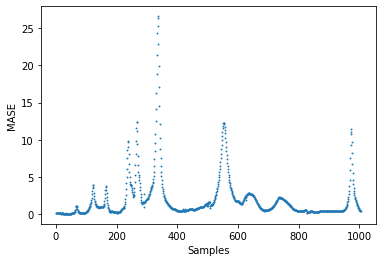

Mean MASE is 2.0549388989718573
STD of MASE is 3.118323260072615


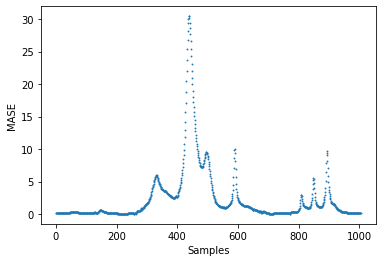

Mean MASE is 2.411090344845196
STD of MASE is 4.525516568448939


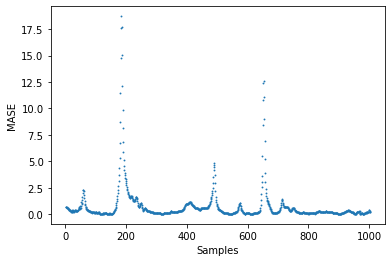

Mean MASE is 0.7294759633888827
STD of MASE is 1.7573111887435073


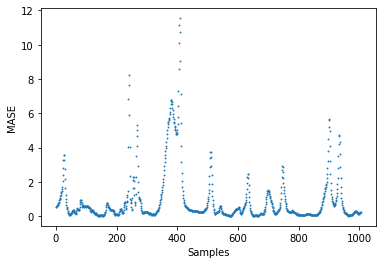

Mean MASE is 0.962131800087886
STD of MASE is 1.5833580777140794


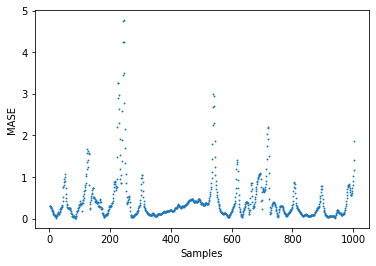

Mean MASE is 0.42480437738931615
STD of MASE is 0.5367174858815404


In [ ]:
xaxis = np.linspace(1,ntestpatterns, ntestpatterns)

plt.scatter(xaxis, errTotM1, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM1))
print('STD of MASE is', np.std(errTotM1))

plt.scatter(xaxis, errTotM2, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM2))
print('STD of MASE is', np.std(errTotM2))

plt.scatter(xaxis, errTotM3, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM3))
print('STD of MASE is', np.std(errTotM3))

plt.scatter(xaxis, errTotM4, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM4))
print('STD of MASE is', np.std(errTotM4))

plt.scatter(xaxis, errTotM5, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM5))
print('STD of MASE is', np.std(errTotM5))

**`BiLSTM Model:**

 **BiLSTM functions**





In [ ]:

# generate input and output pairs of sequences
def create_sequences_BiLSTM(data, length, output):
    nsignals = data.shape[1]
    siglen = data.shape[0]
    sampX=[]
    sampy=[]
    indx = siglen - output - length
    for j in range(nsignals):
        sig = data[:,j]
        for i in range(indx):
            tempX = sig[i:length+i]
            tempy = sig[i+length:length+i+output]
            sampX.append(tempX)
            sampy.append(tempy)
    nsamples = len(sampX)        
    X = np.array(sampX).reshape(nsamples, length, 1)
    y = np.array(sampy).reshape(nsamples, output, 1) 
    return X, y 

In [ ]:
#Split training and test datasets
def define_test_dataset_BiLSTM(X, y, n_patterns, ntestsigs):
    testindex = int(np.floor(ntestsigs*n_patterns))
    X_train = X[:-testindex,:,:]
    y_train = y[:-testindex,:,:]
    X_test = X[-testindex:,:,:]
    y_test = y[-testindex:,:,:]
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train, y_train, X_test, y_test

In [ ]:
def MASE(realData, predictedData):
    """ Regression Error metric = mean absolute scaled error (MASE)"""
    temp = realData.shape
    datlen = temp[1]-1
    a1 = np.reshape(realData[0,1:],[datlen,1])
    a2 = np.reshape(realData[0,:-1],[datlen,1])
    maseErr = mean_absolute_error(a1,predictedData[0,1:])/mean_absolute_error(a1,a2)
    return maseErr

**Load BiLSTM dataset:**

In [ ]:
ndataset = 5
length = 10
output = length

############# POD mode 1
fM1 = h5py.File('PODm1_MHD32BoxALL.mat')
dataM1 = fM1.get('data')
dataM1 = np.transpose(dataM1)

# configure problem
nsignals = dataM1.shape[1]
siglen = dataM1.shape[0]

# Extract sequences
inputdata = dataM1[:,0:ndataset]
XM1, yM1 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM1, y_trainM1, X_testM1_B, y_testM1_B = define_test_dataset_BiLSTM(XM1, yM1, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 2
fM2 = h5py.File('PODm2_MHD32BoxALL.mat')
dataM2 = fM2.get('data')
dataM2 = np.transpose(dataM2)

# Extract sequences
inputdata = dataM2[:,0:ndataset]
XM2, yM2 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM2, y_trainM2, X_testM2_B, y_testM2_B = define_test_dataset_BiLSTM(XM2, yM2, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 3
fM3 = h5py.File('PODm3_MHD32BoxALL.mat')
dataM3 = fM3.get('data')
dataM3 = np.transpose(dataM3)

# Extract sequences
inputdata = dataM3[:,0:ndataset]
XM3, yM3 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM3, y_trainM3, X_testM3_B, y_testM3_B = define_test_dataset_BiLSTM(XM3, yM3, ntestpatterns, ntestsigs)


In [ ]:
############# POD mode 4

fM4 = h5py.File('PODm4_MHD32BoxALL.mat')
dataM4 = fM4.get('data')
dataM4 = np.transpose(dataM4)

# Extract sequences
inputdata = dataM4[:,0:ndataset]
XM4, yM4 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM4, y_trainM4, X_testM4_B, y_testM4_B = define_test_dataset_BiLSTM(XM4, yM4, ntestpatterns, ntestsigs)

In [ ]:
############# POD mode 5

fM5 = h5py.File('PODm5_MHD32BoxALL.mat')
dataM5 = fM5.get('data')
dataM5 = np.transpose(dataM5)

# Extract sequences
inputdata = dataM5[:,0:ndataset]
XM5, yM5 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM5, y_trainM5, X_testM5_B, y_testM5_B= define_test_dataset_BiLSTM(XM5, yM5, ntestpatterns, ntestsigs)
print(X_testM5_B.shape)

(1004, 10, 1)


**Load finalized BiLSTM models:**

In [ ]:
model = load_model('MHD32boxROMncell250lr0.0001bs32c5.h5')
print('Loaded POD model')

Loaded POD model


In [ ]:
nHorizon = 1 # no. of sequences you want to cyclically predict
#timeIndex = np.random.randint(0, ntestpatterns + 1)
timeIndex = 764
print('Time Index is', timeIndex)

Time Index is 764


In [ ]:
############# POD mode 1

##### Cyclic prediction
signalM1_B = np.zeros((1,10))
trueSignalM1_B = np.zeros((1,10))
datainputM1 = X_testM1_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM1 = datainputM1.reshape(1, length, 1)
    predictedM1 = model.predict(datainputM1, verbose=0)
    signalM1_B = np.append(signalM1_B, predictedM1)
    expected = y_testM1_B[timeIndex + i*10,:]
    trueSignalM1_B = np.append(trueSignalM1_B, expected)
    datainputM1 = np.transpose(predictedM1)  

    
############# POD mode 2

##### Cyclic prediction
signalM2_B = np.zeros((1,10))
trueSignalM2_B = np.zeros((1,10))
datainputM2 = X_testM2_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM2 = datainputM2.reshape(1, length, 1)
    predictedM2 = model.predict(datainputM2, verbose=0)
    signalM2_B = np.append(signalM2_B, predictedM2)
    expected = y_testM2_B[timeIndex + i*10,:]
    trueSignalM2_B = np.append(trueSignalM2_B, expected)
    datainputM2 = np.transpose(predictedM2)     

    
############# POD mode 3

##### Cyclic prediction
signalM3_B = np.zeros((1,10))
trueSignalM3_B = np.zeros((1,10))
datainputM3 = X_testM3_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM3 = datainputM3.reshape(1, length, 1)
    predictedM3 = model.predict(datainputM3, verbose=0)
    signalM3_B = np.append(signalM3_B, predictedM3)
    expected = y_testM3_B[timeIndex + i*10,:]
    trueSignalM3_B = np.append(trueSignalM3_B, expected)
    datainputM3 = np.transpose(predictedM3)    
    
    
############# POD mode 4

##### Cyclic prediction
signalM4_B = np.zeros((1,10))
trueSignalM4_B = np.zeros((1,10))
datainputM4 = X_testM4_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM4 = datainputM4.reshape(1, length, 1)
    predictedM4 = model.predict(datainputM4, verbose=0)
    signalM4_B = np.append(signalM4_B, predictedM4)
    expected = y_testM4_B[timeIndex + i*10,:]
    trueSignalM4_B = np.append(trueSignalM4_B, expected)
    datainputM4 = np.transpose(predictedM4)     

    
############# POD mode 5

##### Cyclic prediction
signalM5_B = np.zeros((1,10))
trueSignalM5_B = np.zeros((1,10))
datainputM5 = X_testM5_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM5 = datainputM5.reshape(1, length, 1)
    predictedM5 = model.predict(datainputM5, verbose=0)
    signalM5_B = np.append(signalM5_B, predictedM5)
    expected = y_testM5_B[timeIndex + i*10,:]
    trueSignalM5_B = np.append(trueSignalM5_B, expected)
    datainputM5 = np.transpose(predictedM5)    
    
    
print('Done')

Done


**Plot ALL predicted coefficients**

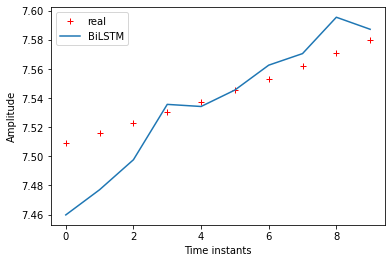

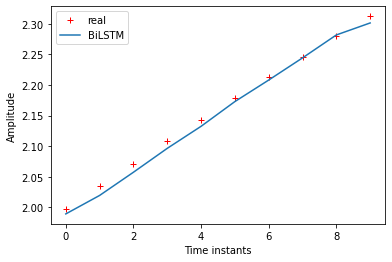

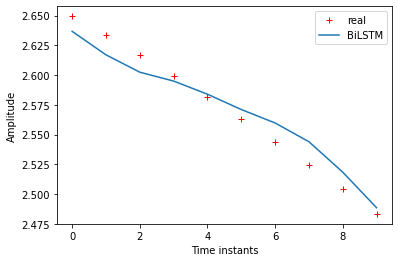

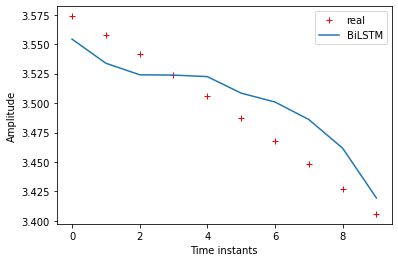

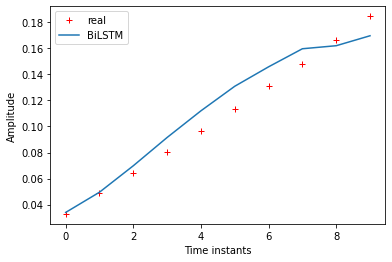

In [ ]:
plt.figure(1)
plt.plot(trueSignalM1_B[10:],'r+', label='real')
plt.plot(signalM1_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(2)
plt.plot(trueSignalM2_B[10:],'r+', label='real')
plt.plot(signalM2_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(3)
plt.plot(trueSignalM3_B[10:],'r+', label='real')
plt.plot(signalM3_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(4)
plt.plot(trueSignalM4_B[10:],'r+', label='real')
plt.plot(signalM4_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(5)
plt.plot(trueSignalM5_B[10:],'r+', label='real')
plt.plot(signalM5_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

**Plot error for all predictions in a model**

In [ ]:
############# POD mode 1
errTotM1 = []

for idx in range(ntestpatterns):
    datainput = X_testM1_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM1_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = model.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM1.append(err)

print('Computed PODm1 err Total Error')

############# POD mode 2
errTotM2 = []

for idx in range(ntestpatterns):
    datainput = X_testM2_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM2_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = model.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM2.append(err)

print('Computed PODm2 err Total Error')

############# POD mode 3
errTotM3 = []

for idx in range(ntestpatterns):
    datainput = X_testM3_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM3_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = model.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM3.append(err)

print('Computed PODm3 err Total Error')


############# POD mode 4
errTotM4 = []

for idx in range(ntestpatterns):
    datainput = X_testM4_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM4_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = model.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM4.append(err)

print('Computed PODm4 err Total Error')

############# POD mode 5
errTotM5 = []

for idx in range(ntestpatterns):
    datainput = X_testM5_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM5_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = model.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM5.append(err)

print('Computed PODm5 err Total Error')

Computed PODm1 err Total Error
Computed PODm2 err Total Error
Computed PODm3 err Total Error
Computed PODm4 err Total Error
Computed PODm5 err Total Error


**plot MASE for all POD modes**

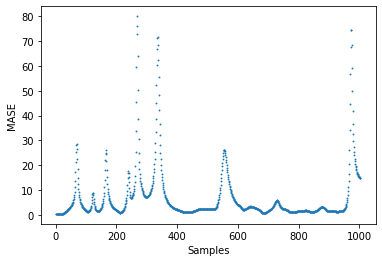

Mean MASE is 6.875067720950927
STD of MASE is 11.189548760451089


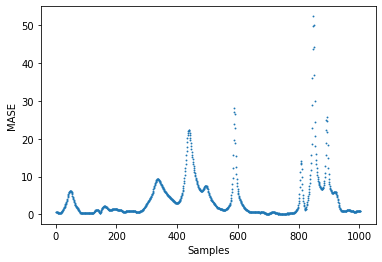

Mean MASE is 4.1543501990605725
STD of MASE is 5.990793402096641


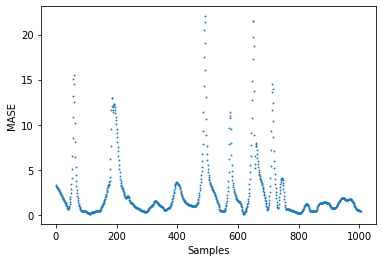

Mean MASE is 2.421867784692981
STD of MASE is 3.260202415750517


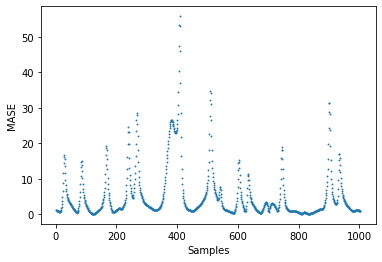

Mean MASE is 5.349707003973189
STD of MASE is 7.55704994309753


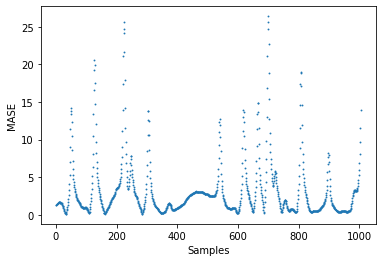

Mean MASE is 3.176689190437711
STD of MASE is 3.9941438982264352


In [ ]:
xaxis = np.linspace(1,ntestpatterns, ntestpatterns)

plt.scatter(xaxis, errTotM1, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM1))
print('STD of MASE is', np.std(errTotM1))

plt.scatter(xaxis, errTotM2, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM2))
print('STD of MASE is', np.std(errTotM2))

plt.scatter(xaxis, errTotM3, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM3))
print('STD of MASE is', np.std(errTotM3))

plt.scatter(xaxis, errTotM4, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM4))
print('STD of MASE is', np.std(errTotM4))

plt.scatter(xaxis, errTotM5, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM5))
print('STD of MASE is', np.std(errTotM5))